# Chapter 10: Interest Rate Risk


This chapter discusses interest rate risk exposures faced by financial institutions. It presents two key analyses used to assess these exposures: funding gap analysis and duration gap analysis. Additionally, you'll explore various methods to manage interest rate risk, specifically through the use of forward contracts and interest rate swaps.

Chapter Objectives:

1. Introduce interest rate risk
2. Discuss funding gap analysis
3. Discuss duration gap analysis
4. Hedge interest rate risk using forward contracts
5. Hedge interest rate risk using interest rate swaps 

In [1]:
RSA = 30+30+70+40
print("the amount of rate sensitive assets is", RSA)
RSL = 40+30+20
print("the amount of rate sensitive liabilities is", RSL)
GAP = RSA-RSL
print("the repricing gap is", GAP)
delta_R = 0.01
delta_NII = GAP*delta_R
print("the change in net interest income is", delta_NII)


the amount of rate sensitive assets is 170
the amount of rate sensitive liabilities is 90
the repricing gap is 80
the change in net interest income is 0.8


In [2]:
# Create a list CF to hold cash flows
CF = []
# Calculate the coupon payment each year
for i in range(6):
    CF.append(1000*0.08)
# Add the principal payment to the last year
CF[-1] += 1000

# create the present value of each cash flow
PV_CF = []
for i in range(len(CF)):
    PV_CF.append(CF[i]/(1+0.08)**(i+1))

# Calculate Macaulay Duration
duration = 0
for i in range(len(PV_CF)):
    duration += PV_CF[i]*(i+1)/1000
print("the Macaulay duration is", round(duration,2)) 


the Macaulay duration is 4.99


In [3]:
# Define values
duration_asset = 5
duration_liability = 3
assets = 100
liabilities = 90
delta_R = 0.01
R = 0.1

# Calculate change in interest income
delta_income = -duration_asset*assets*delta_R/(1+R)
print("the change in interest income is", round(delta_income,2))

# Calculate change in interest liabilities
delta_liability = -duration_liability*liabilities*delta_R/(1+R)
print("the change in interest liability is", round(delta_liability,2))

# Calculate shareholder value change
delta_equity = delta_income - delta_liability
print("the change in shareholder value is", round(delta_equity,2))


the change in interest income is -4.55
the change in interest liability is -2.45
the change in shareholder value is -2.09


In [4]:
duration_liability = 3
assets = 100
liabilities = 90

asset_duration = duration_liability*liabilities/assets
print("Asset duration is", asset_duration, 'years')


Asset duration is 2.7 years


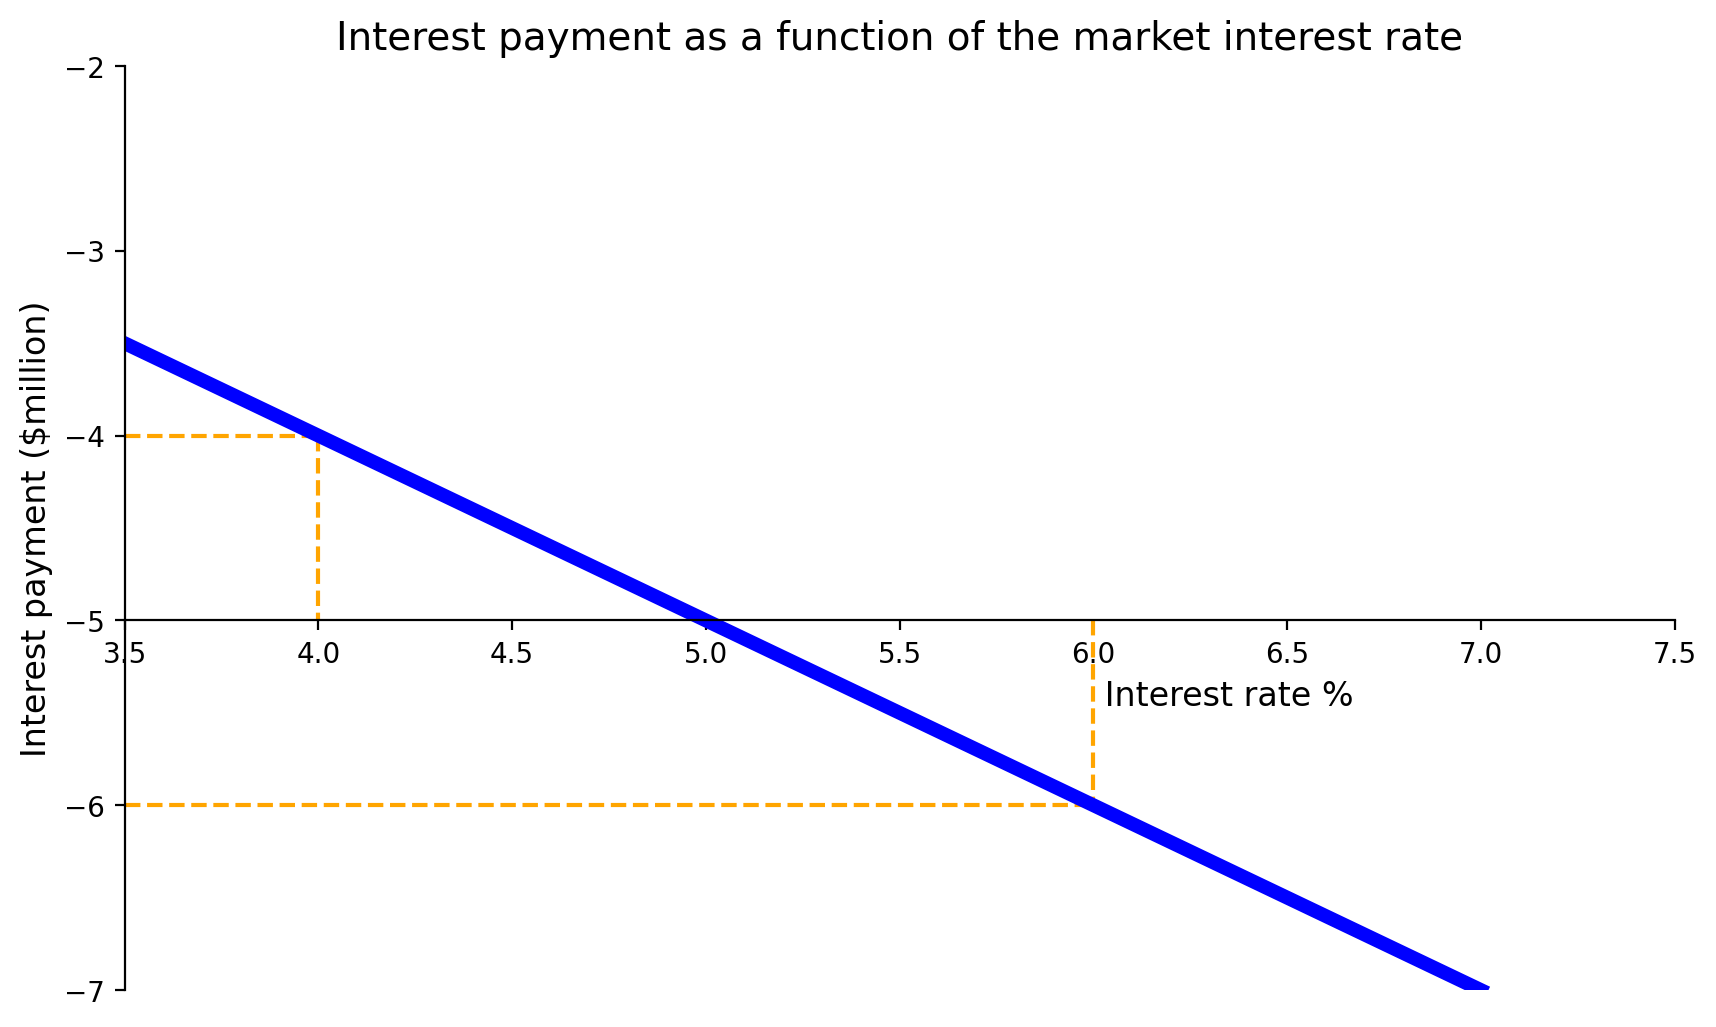

In [5]:
import numpy as np
import matplotlib.pyplot as plt

rate = np.linspace(3.5,7,1000)
interest = np.zeros((1000,))

for i in range(1000):
    interest[i] = - 100*rate[i]/100

fig = plt.figure(dpi=200, figsize=(10,6))
axes = plt.gca()
axes.set_xlim([3.5,7.5])
axes.set_ylim([-7,-2])
axes.spines['bottom'].set_position(('data', -5))

axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')

x1 = np.array([3.5,4])
y1 = np.array([-4,-4])
x2 = np.array([4,4])
y2 = np.array([-4,-5])

plt.plot(x1, y1, '--',color='orange')
plt.plot(x2, y2, '--',color='orange')

x3 = np.array([3.5,6])
y3 = np.array([-6,-6])
x4 = np.array([6,6])
y4 = np.array([-5,-6])

plt.plot(x3, y3, '--',color='orange')
plt.plot(x4, y4, '--',color='orange')

plt.plot(rate, interest, color='blue', linewidth = '5')
plt.xlabel('                                                              Interest rate %',fontsize=12)
plt.ylabel('Interest payment ($million)',fontsize=12)
plt.title('Interest payment as a function of the market interest rate',fontsize=14)
plt.show()


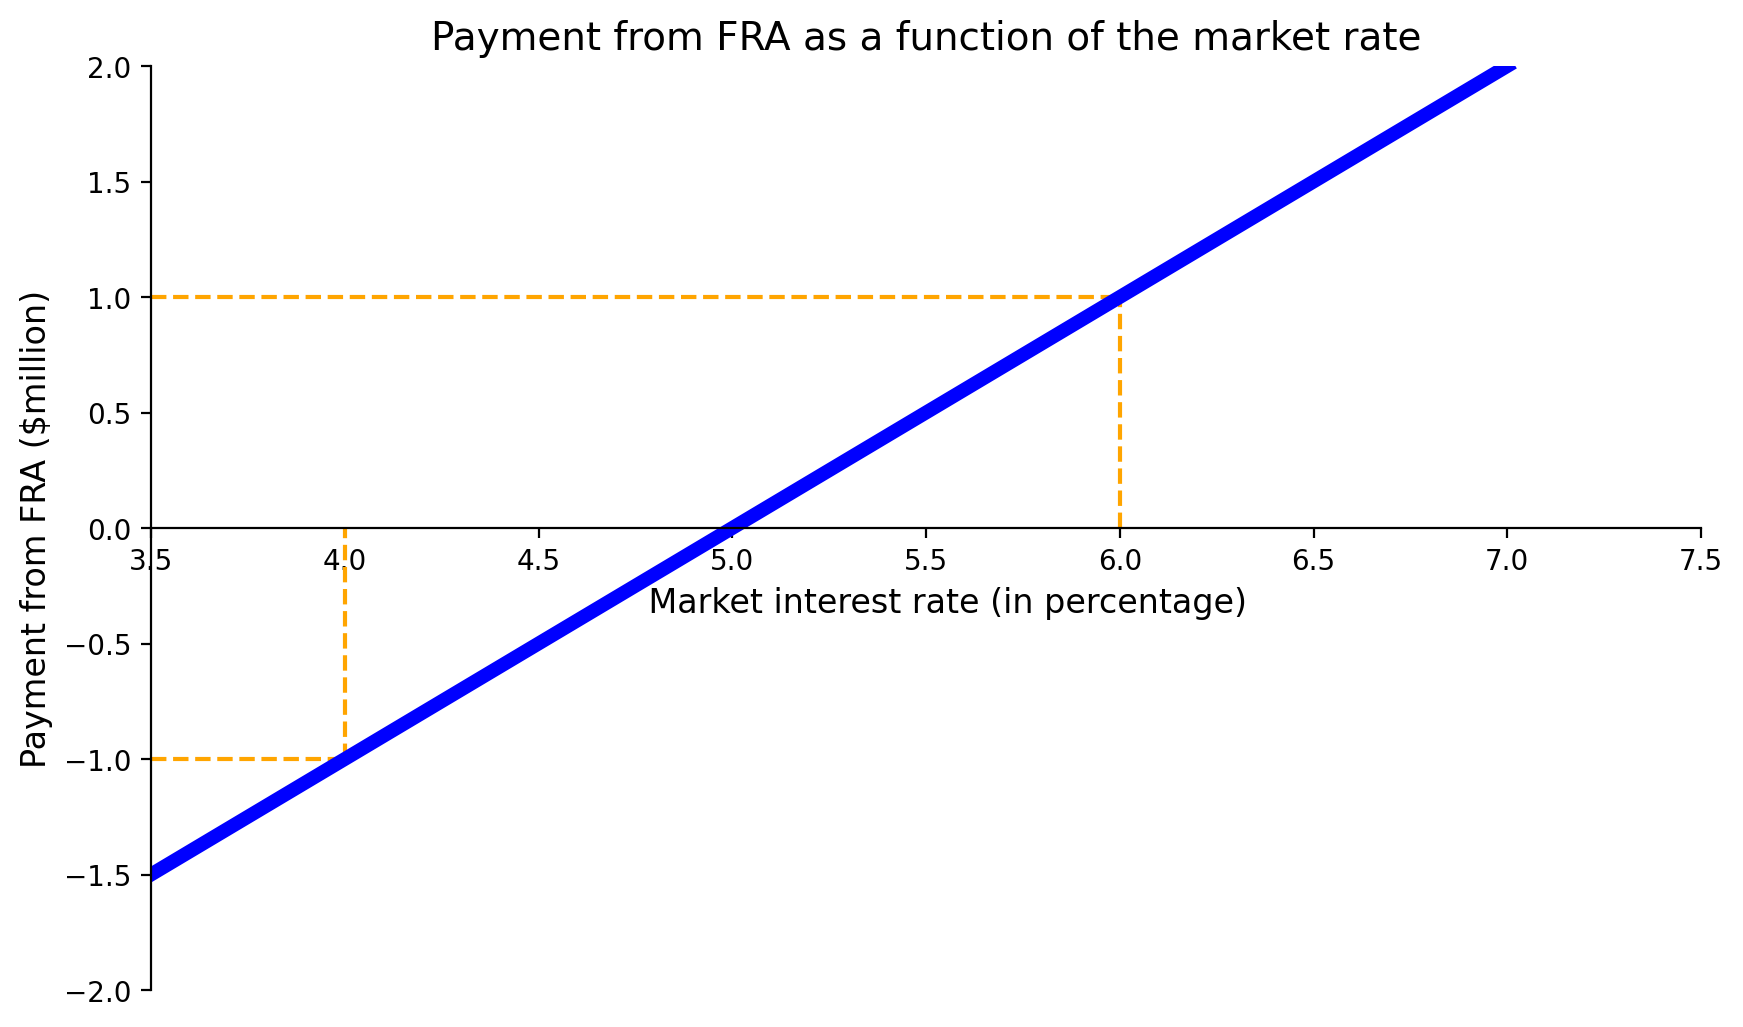

In [6]:
interest = np.zeros((1000,))

for i in range(1000):
    interest[i] = 100*(rate[i]-5)/100

fig = plt.figure(dpi=200, figsize=(10,6))
axes = plt.gca()
axes.set_xlim([3.5,7.5])
axes.set_ylim([-2,2])
axes.spines['bottom'].set_position('center')

axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')

x1 = np.array([3.5,4])
y1 = np.array([-1,-1])
x2 = np.array([4,4])
y2 = np.array([-1,0])

plt.plot(x1, y1, '--',color='orange')
plt.plot(x2, y2, '--',color='orange')

x3 = np.array([3.5,6])
y3 = np.array([1,1])
x4 = np.array([6,6])
y4 = np.array([0,1])

plt.plot(x3, y3, '--',color='orange')
plt.plot(x4, y4, '--',color='orange')

plt.plot(rate, interest, color='blue', linewidth = '5')
plt.xlabel('    Market interest rate (in percentage)',fontsize=12)
plt.ylabel('Payment from FRA ($million)',fontsize=12)
plt.title('Payment from FRA as a function of the market rate',fontsize=14)
plt.show()


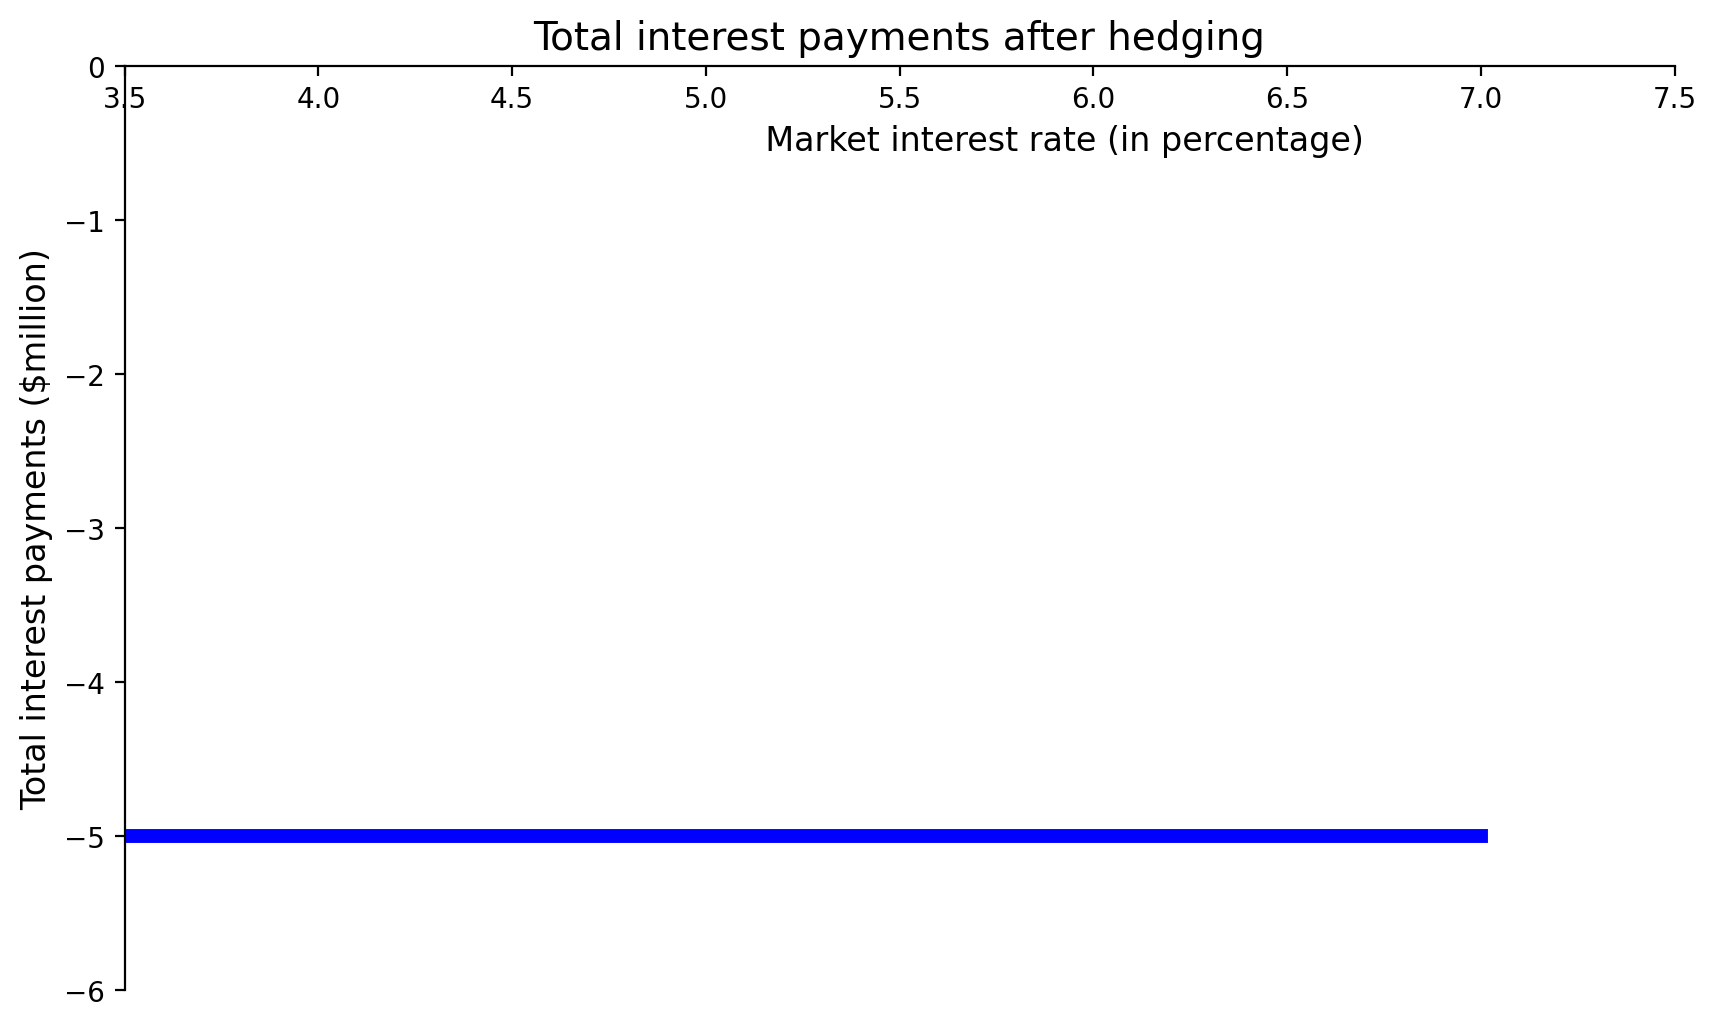

In [7]:
interest = np.zeros((1000,))
for i in range(1000):
    interest[i] = -5

fig = plt.figure(dpi=200, figsize=(10,6))
axes = plt.gca()
axes.set_xlim([3.5,7.5])
axes.set_ylim([-6,0])
axes.spines['bottom'].set_position(('data',0))
axes.spines['right'].set_color('none')
axes.spines['top'].set_color('none')
plt.plot(rate, interest, color='blue', linewidth = '5')
plt.xlabel('                               Market interest rate (in percentage)',fontsize=12)
plt.ylabel('Total interest payments ($million)',fontsize=12)
plt.title('Total interest payments after hedging',fontsize=14)
plt.show()


In [8]:
loan=100
margin=0.02
def net(s):
    net_value=loan*(margin+s)-5
    return net_value

result=net(0.02)
print('Net payment when SOFR is 0.02 =', result)
result=net(0.05)
print('Net payment when SOFR is 0.05=', round(result,2))


Net payment when SOFR is 0.02 = -1.0
Net payment when SOFR is 0.05= 2.0
